### Logistic regression

$\mathbf{X} = [\mathbf{x_1}; ... ; \mathbf{x_n}] \in R_{n \times d + 1}$,

$\mathbf{w} = [w_0; ... ; w_d] \in R_{d + 1 \times 1}$,

$\mathbf{y} = [y_1, ... ,y_n] \in R_{1 \times n}$

$\mathbf{h} = p(\mathbf{y}|\mathbf{X}; \mathbf{w}) = \mathbf{z}^{\mathbf{y}} (1 - \mathbf{z})^{\mathbf{1 - y}}$;
$\mathbf{z} = f(\mathbf{X w})$

$f(x) = \frac{1}{1 + e^{-x}}$, $f(x) = tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

$\mathcal{L(w)} = ||- \mathbf{y} * log(\mathbf{z}) - (1-\mathbf{y}) log(1 - \mathbf{z})||_1 \div n$

### Weight decay

$||\mathcal{L(w)} = - \mathbf{y} * log(\mathbf{z}) - (1-\mathbf{y}) log(1 - \mathbf{z})||_1 \div n + \frac{\lambda}{2} ||\mathbf{w}||^2_2$

### Stochastic gradient descent

$\nabla_w J(\mathbf{w}; \mathbf{x_i}, y_i) = -(\frac{y_i}{z_i} - \frac{1- y_i}{1- z_i})\nabla_w z_i + \lambda \mathbf{w} = \frac{z_i - y_i}{z_i (1 - z_i)} \nabla_w z_i + \lambda \mathbf{w}$

$\nabla_w z_i = z_i (1 - z_i) \mathbf{x_i}  \rightarrow \nabla_w J(\mathbf{w}; \mathbf{x_i}, y_i) = (z_i - y_i) \mathbf{x_i} + \lambda \mathbf{w}$

In [98]:
import numpy as np

def sigmoid(z):
    return 1/(1 + np.exp(-z))
def prod(w, X):
    return sigmoid(X.dot(w))
def loss(w, X, y, lam):
    z = prod(w, X)
    return -np.mean(y*np.log(z) +(1-y)*np.log(1 - z)) + 0.5*lam*np.mean(w*w)

In [99]:
def logistic_regression(w_init, X, y, lam = 0.001, lr = 0.1, nepoches = 2000):
    # lam - reg paramether, lr - learning rate, nepoches - number of epoches
    N, d = X.shape[0], X.shape[1]
    w = w_old = w_init
    loss_hist = [loss(w, X, y, lam)]
    ep = 0
    while ep < nepoches:
        ep = ep + 1
        miss_idxs = np.random.permutation(N)
        for i in miss_idxs:
            xi = X[i]
            yi = y[i]
            zi = sigmoid(xi.dot(w))
            w = w -lr*((zi - yi)*xi + lam*w)
        loss_hist.append(loss(w, X, y, lam))
        if np.linalg.norm(w - w_old)/d < 1e-6: break
        w_old = w
    return (w, loss_hist)

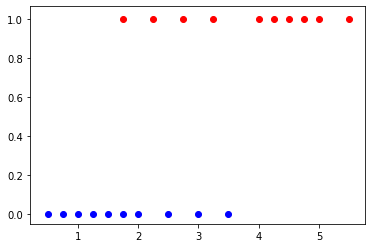

In [113]:
import matplotlib.pyplot as plt
N= 20

_X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
               2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]]).T

y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

y_true_index = np.where(y == True)
y_false_index = np.where(y == False)

# show graph
plt.scatter(_X[y_true_index], y[y_true_index], c="red")
plt.scatter(_X[y_false_index], y[y_false_index], c="blue")
plt.show()

X = np.concatenate((_X, np.ones((N, 1))), axis = 1)

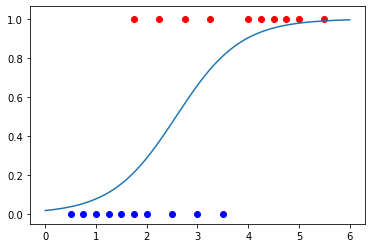

In [114]:
w_init = np.random.randn(X.shape[1]); lam = 0.0001
w, loss_hist = logistic_regression(w_init, X, y, lam, lr = 0.05, nepoches = 500)

# show graph
plt.scatter(_X[y_true_index], y[y_true_index], c="red")
plt.scatter(_X[y_false_index], y[y_false_index], c="blue")

dom = np.linspace(0, 6, 1000)
val = [sigmoid(x*w[0] + w[1]) for x in dom]
plt.plot(dom, val); plt.show()

plt.show()